In [59]:
import torch
import torch.nn.functional as F
import requests
r = requests.get(r'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt')

with open('names.txt', 'wb') as f:
    f.write(r.content)

words = open('names.txt', 'r').read().splitlines()

In [60]:
len(words)

32033

In [61]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
itos, stoi

({1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z',
  0: '.'},
 {'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26,
  '.': 0})

In [62]:
# build the dataset
block_size = 3 # context length : ho0w many characters do we need to predict the next character
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    
    for ch in w +'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [63]:
X ,Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [6]:
F.one_hot(X, num_classes = 27)[1]

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [7]:
X.shape, X.dtype , Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
C = torch.randn((27,2))
C

tensor([[ 0.9140,  3.0003],
        [ 0.3579,  0.4726],
        [ 2.1061,  0.7410],
        [ 0.2543, -0.8822],
        [ 0.1145, -0.5642],
        [ 1.5342, -0.7011],
        [-0.5336,  0.8885],
        [ 0.6839,  0.0521],
        [ 0.1699,  0.8506],
        [-0.0217,  0.1630],
        [ 0.1877,  0.1430],
        [ 2.6807, -1.1087],
        [ 0.3013, -0.0593],
        [ 0.0801,  1.1582],
        [ 0.2726,  1.1239],
        [-1.6469,  2.3162],
        [ 0.0212, -1.3451],
        [-0.8573,  0.9109],
        [-0.0372,  1.5612],
        [ 1.7761,  1.0509],
        [-0.2417,  0.3661],
        [-0.5722, -0.8949],
        [-0.4513, -1.3937],
        [-0.2584,  0.5907],
        [ 1.1662, -0.2259],
        [-2.7184,  1.6384],
        [ 0.0495,  0.2518]])

In [9]:
C.shape, X.shape

(torch.Size([27, 2]), torch.Size([32, 3]))

In [10]:
C[0]

tensor([0.9140, 3.0003])

In [11]:
C[X]

tensor([[[ 0.9140,  3.0003],
         [ 0.9140,  3.0003],
         [ 0.9140,  3.0003]],

        [[ 0.9140,  3.0003],
         [ 0.9140,  3.0003],
         [ 1.5342, -0.7011]],

        [[ 0.9140,  3.0003],
         [ 1.5342, -0.7011],
         [ 0.0801,  1.1582]],

        [[ 1.5342, -0.7011],
         [ 0.0801,  1.1582],
         [ 0.0801,  1.1582]],

        [[ 0.0801,  1.1582],
         [ 0.0801,  1.1582],
         [ 0.3579,  0.4726]],

        [[ 0.9140,  3.0003],
         [ 0.9140,  3.0003],
         [ 0.9140,  3.0003]],

        [[ 0.9140,  3.0003],
         [ 0.9140,  3.0003],
         [-1.6469,  2.3162]],

        [[ 0.9140,  3.0003],
         [-1.6469,  2.3162],
         [ 0.3013, -0.0593]],

        [[-1.6469,  2.3162],
         [ 0.3013, -0.0593],
         [-0.0217,  0.1630]],

        [[ 0.3013, -0.0593],
         [-0.0217,  0.1630],
         [-0.4513, -1.3937]],

        [[-0.0217,  0.1630],
         [-0.4513, -1.3937],
         [-0.0217,  0.1630]],

        [[-0.4513, -1

In [12]:
C[X].shape

torch.Size([32, 3, 2])

In [13]:
C[torch.tensor(10)]

tensor([0.1877, 0.1430])

In [14]:
C[10]

tensor([0.1877, 0.1430])

In [15]:
 C[torch.arange(28)]

IndexError: index 27 is out of bounds for dimension 0 with size 27

In [16]:
C[torch.arange(10)]

tensor([[ 0.9140,  3.0003],
        [ 0.3579,  0.4726],
        [ 2.1061,  0.7410],
        [ 0.2543, -0.8822],
        [ 0.1145, -0.5642],
        [ 1.5342, -0.7011],
        [-0.5336,  0.8885],
        [ 0.6839,  0.0521],
        [ 0.1699,  0.8506],
        [-0.0217,  0.1630]])

In [17]:
C[torch.randint(0,27, (2,3))], C[torch.randint(0,27, (2,3))].shape

(tensor([[[-0.2417,  0.3661],
          [-0.8573,  0.9109],
          [ 0.3579,  0.4726]],
 
         [[ 0.1699,  0.8506],
          [ 0.0495,  0.2518],
          [ 0.1145, -0.5642]]]),
 torch.Size([2, 3, 2]))

In [18]:
torch.randint(0,27, (2,3))

tensor([[17, 23,  4],
        [21,  3, 26]])

In [19]:
X[13,2]

tensor(1)

In [20]:
C[X][13,2]

tensor([0.3579, 0.4726])

In [21]:
C[1]

tensor([0.3579, 0.4726])

# # EMbeddings

In [22]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [23]:
W1  = torch.rand(6,100) #these are the weights of the neurons 6 is the input size 3 -> num of words and 2 num of dims
b1 = torch.rand(100)

In [24]:
emb.view(-1, 6).shape

torch.Size([32, 6])

In [25]:
# we have to change the dim of the embeddings with respect to the dimensions of the weigts for mat mul
h = torch.tanh(emb.view(-1, 6) @ W1 + b1 )  # here -1 represents 32 which is the batch dimension  and -1 will automatically infer the current dimension of its position
h

tensor([[ 1.0000,  0.9966,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
        [ 0.9659,  0.9952,  1.0000,  ...,  1.0000,  1.0000,  0.9999],
        [ 0.9979,  0.5991,  0.9993,  ...,  0.9998,  1.0000,  0.9996],
        ...,
        [ 0.0275, -0.7107, -0.3122,  ...,  0.1002,  0.9505,  0.9208],
        [ 0.7672,  0.4046,  0.2961,  ..., -0.1645,  0.2054, -0.6337],
        [ 0.9025,  0.4004,  0.9253,  ...,  0.9285,  0.9814,  0.9149]])

In [26]:
h.shape

torch.Size([32, 100])

In [27]:
W2 = torch.randn(100,27)
b2 = torch.randn(27)


In [28]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [29]:
counts = logits.exp()

In [30]:
probs = counts/ counts.sum(1, keepdims= True)
probs.shape

torch.Size([32, 27])

In [31]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [32]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [33]:
probs[torch.arange(32), Y], probs[torch.arange(32), Y].shape

(tensor([1.0786e-12, 2.1778e-14, 4.9461e-14, 1.7301e-08, 3.2897e-18, 2.4639e-15,
         2.5473e-02, 6.0515e-21, 1.0292e-06, 9.8767e-01, 5.1453e-07, 5.2972e-02,
         4.7178e-09, 4.0485e-08, 4.0758e-07, 5.4680e-07, 3.0389e-21, 7.1905e-06,
         4.7775e-09, 1.5946e-11, 1.4861e-12, 3.1651e-02, 6.3935e-02, 8.7243e-09,
         1.7873e-15, 5.9453e-06, 2.4942e-15, 1.0612e-09, 3.3534e-05, 3.2553e-12,
         4.1756e-05, 7.7322e-17]),
 torch.Size([32]))

In [34]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(20.8594)

In [ ]:
# ---- now made respectable ----

In [84]:
# build the dataset
block_size = 3 # context length : ho0w many characters do we need to predict the next character
X, Y = [], []

for w in words:
#     print(w)
    context = [0] * block_size
    
    for ch in w +'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        
#         print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, X.dtype , Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [72]:
X.shape , Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [147]:
g = torch.Generator().manual_seed(2147483647)
C =  torch.rand((27,2), generator = g)
W1 = torch.randn((6,100), generator = g)
b1 = torch.randn(100, generator = g)
W2 = torch.randn((100,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [148]:
sum(p.nelement() for 
    p in parameters)

3481

In [149]:
for p in parameters:
    p.requires_grad = True

In [150]:
lre = torch.linspace(-3, 0, 1000)  #lre is learning rate exponential
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [100]:
# counts = logits.exp()
# probs = counts / counts.sum(1, keepdims = True)
# loss = -probs[torch.arange(32), Y].log().mean()

# the above lines are cross_entropy loss
# but always use F.cross_entropy() 
# reasons much efficient backward and forward pass
# And the numbers are numerically well behaved in crossentropy
# example
# the probs will become infinity when there is bigger positive numbers considering we have negative numbers also

# logits = torch.tensor([-5,-3, 0, 5])
# counts = logits.exp()
# probs = counts / counts.sum()
# probs

# so pytorch solves it by subtracting the entire tensors with the max value from that tensor 
# then the max value will be zero and others will be negative


# logits = torch.tensor([-5,-3, 0, 100]) -100
# counts = logits.exp()
# probs = counts / counts.sum()
# probs

In [79]:
for i in range(10000):
    #Forward pass
    emb = C[X] #(32,3,2)
    h = torch.tanh(emb.view(-1, 6) @ W1 +b1) # (32, 100)
    logits = h @ W2 + b2 #(32, 27)
    loss = F.cross_entropy(logits, Y)
#     print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    
    #update
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())


0.25174373388290405


In [145]:
lri = []
lossi = []

for i in range(1000):
    
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    #update 
    lr = lrs[i]
    for p in parameters:
        p.data += -lr *p.grad
    
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())        

9.194597244262695


In [154]:
lri = []
lossi = []

for i in range(10000):
    
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    
    #forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    #update 
    lr = 0.01
    for p in parameters:
        p.data += -lr *p.grad
    
#     lri.append(lre[i])
#     lossi.append(loss.item())
print(loss.item())        

2.190373659133911


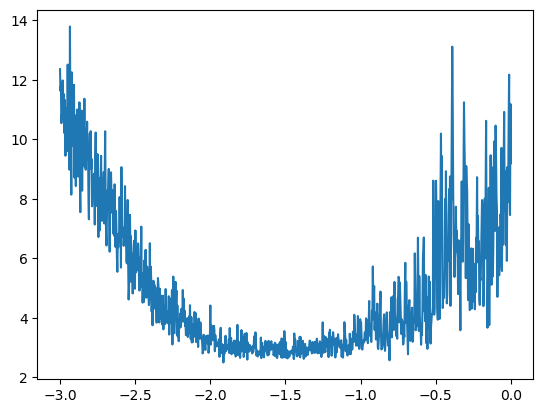

In [146]:
import matplotlib.pyplot as plt
plt.plot(lri, lossi)

In [82]:
logits.max(1) #It will give the max value and also the corresponding indices

torch.return_types.max(
values=tensor([11.1148, 20.9239, 19.6394, 22.5136, 20.0425, 11.1148, 21.1050, 21.2855,
        19.4115, 16.8885, 21.2223, 16.2022, 11.1148, 15.4837, 25.8463, 20.5911,
        11.1148, 14.7327, 21.6894, 19.7582, 23.8014, 20.1148, 25.2369, 22.5962,
        16.2593, 11.1148, 18.5735, 20.5273, 18.4376, 15.9880, 18.7720, 17.6500],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [155]:
#forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.351369619369507


In [105]:
X.shape[0]

228146

In [156]:
## How to get the optimal Learning rate
# initialize the learning rate and infer the loss 

## Create Train Val(dev) and test sets

In [182]:
#build dattaset

def build_dataset(words):
    assert isinstance(words, list), 'the given input shoul be a list'
    
    block_size = 3
    X, Y = [], []
    
    for w in words:
        context = [0] * block_size
        
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

print(f"training set - {Xtr.shape} , {Ytr.shape}")
print(f"val/dev set - {Xdev.shape} , {Ydev.shape}")
print(f"test set - {Xte.shape} , {Yte.shape}")


torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])
training set - torch.Size([182512, 3]) , torch.Size([182512])
val/dev set - torch.Size([22860, 3]) , torch.Size([22860])
test set - torch.Size([22774, 3]) , torch.Size([22774])


In [183]:
Xtr.shape, Ytr.shape

(torch.Size([182512, 3]), torch.Size([182512]))

In [192]:
g = torch.Generator().manual_seed(2147483647)
C =  torch.rand((27,2), generator = g)
W1 = torch.randn((6,300), generator = g)
b1 = torch.randn(300, generator = g)
W2 = torch.randn((300,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [193]:
sum(p.nelement() for 
    p in parameters)

10281

In [194]:
for p in parameters:
    p.requires_grad = True

In [209]:
lri = []
lossi = []
stepi = []

for i in range(30000):
    
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    #forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    #update 
    lr = 0.01
    for p in parameters:
        p.data += -lr *p.grad
    
#     lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())
print(loss.item())        

1.910431146621704


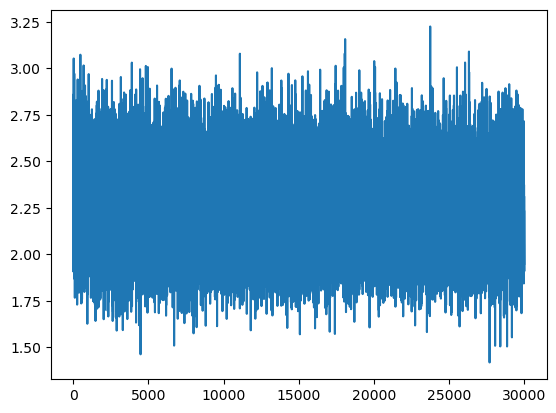

In [210]:
plt.plot(stepi, lossi)

In [211]:
#forward pass
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.2516093254089355


In [212]:
#forward pass
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.24228572845459


## Visualize the embedding dimensions of the letters

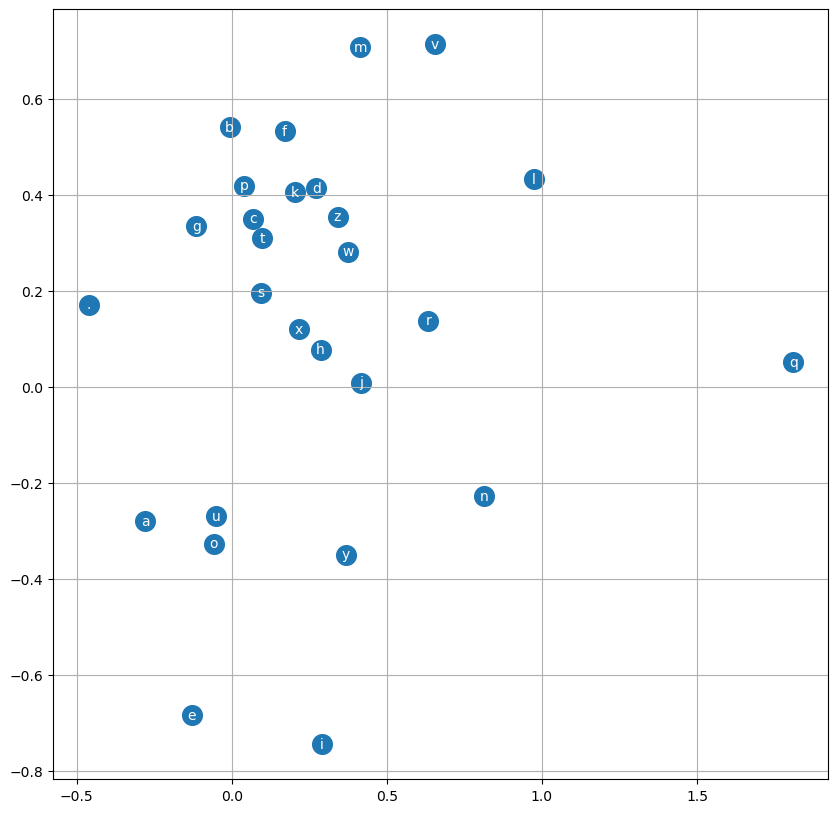

In [214]:
plt.figure(figsize = (10,10))
plt.scatter(C[:,0].data, C[:,1].data, s= 200)

for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = "center", va = "center", color = 'white')
    
plt.grid('minor')

## Increase the embedding dimensions

In [288]:
g = torch.Generator().manual_seed(2147483647)
C =  torch.rand((27,10), generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27, generator = g)
parameters = [C, W1, b1, W2, b2]

In [289]:
sum(p.nelement() for 
    p in parameters)

11897

In [290]:
for p in parameters:
    p.requires_grad = True

In [273]:
lri = []
lossi = []
stepi = []

In [291]:

for i in range(50000):
    
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (100,))
    
    #forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 +b2
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())
    
    #backward pass
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    #update 
#     lr = 0.1
    lr = 0.1 if i <30000 else 0.01
    for p in parameters:
        p.data += -lr *p.grad
    
#     lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())        

2.340754985809326


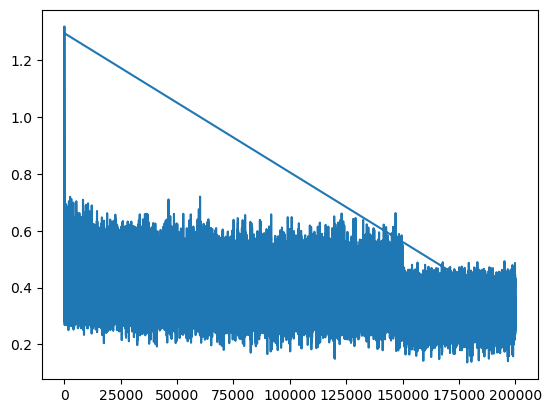

In [292]:
plt.plot(stepi, lossi)

In [293]:
#forward pass
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.2456228733062744


In [294]:
#forward pass
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.252153158187866


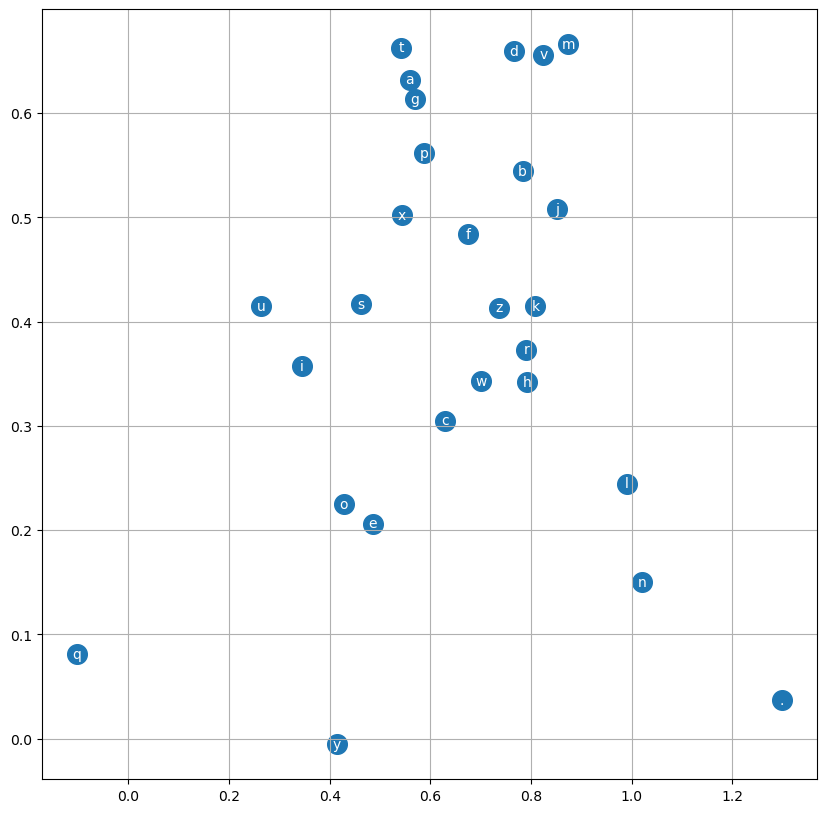

In [295]:
plt.figure(figsize = (10,10))
plt.scatter(C[:,0].data, C[:,1].data, s= 200)

for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = "center", va = "center", color = 'white')
    
plt.grid('minor')

In [296]:
#sample from the model

g= torch.Generator().manual_seed(100)

for _ in range(20):
    
    out = []
    context = [0] * block_size
    
    while True:
        emb = C[torch.tensor([context])]  #(1, blocksize, dim)
        h = torch.tanh(emb.view(1,-1)) @ W1 + b1
        logits = h @ W2 +b2
        probs = F.softmax(logits, dim =1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        
        if ix == 0:
            break
    
    print("".join(itos[i] for i in out))
        

ucdeeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeet.
ucdiaeeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeet.
ucdias.
ucdias.
ucdeeetdieeetdieeetdieeetd.
ucdiaseeetdieeetdieeet.
ucdeeetdieeet.
ucdiaseeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeet.
ucdiaseeetdieeetdieeetdieeetdieeetdieeetdieeetd.
ucdiaseeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeet.
zcoeetdieeetdieeetdieeetdieeetdieeet.
ucdiaseeetdieeetdieeet.
ucdiaseeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeet.
ucdiaseeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdieeetdie